In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### GETTING HISTORIC DATA

In [2]:
asset = ['BTC-USD']

In [3]:
asset_data = yf.download(asset,start='2022-01-01')

[*********************100%***********************]  1 of 1 completed


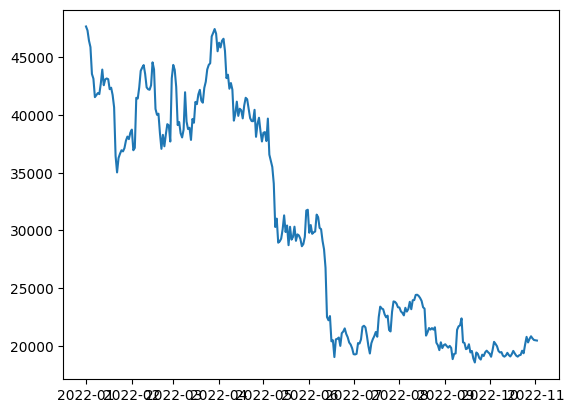

In [4]:
plt.plot(asset_data.Close)

In [2]:
def get_historic_price():
    """
    get historic price data via yahoo finance
    """
    
    asset = ['xrp-usd']
    asset_data = yf.download(asset,start='2020-01-01')
    return asset_data

In [52]:
df = get_historic_price()

[*********************100%***********************]  1 of 1 completed


In [4]:
df.index.astype(str)

Index(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
       '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
       ...
       '2022-10-23', '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
       '2022-10-28', '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-02'],
      dtype='object', name='Date', length=1036)

In [32]:
df.columns = df.columns.str.lower()

In [6]:
df.shape

(1036, 6)

In [7]:
df.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2020-01-01,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003
2020-01-02,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426
2020-01-03,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043
2020-01-04,0.193521,0.194653,0.191835,0.194355,0.194355,999331594
2020-01-05,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557


In [8]:
df.dtypes

open         float64
high         float64
low          float64
close        float64
adj close    float64
volume         int64
dtype: object

## visualization

#### we'll visual the price movement, trends and moving averages

 Why Use a Moving Average

    - A moving average helps cut down the amount of noise on a price chart. Look at the direction of the moving average to get a basic idea of which way the price is moving. If it is angled up, the price is moving up (or was recently) overall; angled down, and the price is moving down overall; moving sideways, and the price is likely in a range.

    - A moving average can also act as support or resistance. In an uptrend, a 50-day, 100-day, or 200-day moving average may act as a support level, as shown in the figure below. This is because the average acts like a floor (support), so the price bounces up off of it. In a downtrend, a moving average may act as resistance; like a ceiling, the price hits the level and then starts to drop again. 

In [33]:
df['test_date'] = df.index

In [34]:
df['test_date'] = pd.to_datetime(df.test_date)

In [35]:
df["day"] = df['test_date'].map(lambda x: x.day)
df["month"] = df['test_date'].map(lambda x: x.month)
df["year"] = df['test_date'].map(lambda x: x.year)

In [36]:
df

,open,high,low,close,adj close,volume,test_date,day,month,year
Date,,,,,,,,,,
2020-01-01,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003,2020-01-01,1,1,2020
2020-01-02,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426,2020-01-02,2,1,2020
2020-01-03,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043,2020-01-03,3,1,2020
2020-01-04,0.193521,0.194653,0.191835,0.194355,0.194355,999331594,2020-01-04,4,1,2020
2020-01-05,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557,2020-01-05,5,1,2020
...,...,...,...,...,...,...,...,...,...,...
2022-10-28,0.462427,0.474674,0.457785,0.473981,0.473981,1201992237,2022-10-28,28,10,2022
2022-10-29,0.473984,0.481666,0.467697,0.470416,0.470416,1404785407,2022-10-29,29,10,2022
2022-10-30,0.470407,0.472510,0.455642,0.458455,0.458455,964813817,2022-10-30,30,10,2022


- The data is from yahoo finance so it doesnt need much augmentation
- we will check if the asset shows seaonality or obvious trends using statsmodels

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
df

,open,high,low,close,adj close,volume,test_date,day,month,year
Date,,,,,,,,,,
2020-01-01,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003,2020-01-01,1,1,2020
2020-01-02,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426,2020-01-02,2,1,2020
2020-01-03,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043,2020-01-03,3,1,2020
2020-01-04,0.193521,0.194653,0.191835,0.194355,0.194355,999331594,2020-01-04,4,1,2020
2020-01-05,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557,2020-01-05,5,1,2020
...,...,...,...,...,...,...,...,...,...,...
2022-10-28,0.462427,0.474674,0.457785,0.473981,0.473981,1201992237,2022-10-28,28,10,2022
2022-10-29,0.473984,0.481666,0.467697,0.470416,0.470416,1404785407,2022-10-29,29,10,2022
2022-10-30,0.470407,0.472510,0.455642,0.458455,0.458455,964813817,2022-10-30,30,10,2022


In [54]:
df['test_date'] = df.index.astype(str)

In [55]:
df.index=df.test_date.to_timestamp()

TypeError: unsupported Type DatetimeIndex

In [56]:
res = seasonal_decompose(df.close,model='muplicative')

AttributeError: 'DataFrame' object has no attribute 'close'

In [57]:
# the below doesnt show any trend to report on and seasonlity is also not clearly present
res.plot();

NameError: name 'res' is not defined

### ill return these in a function to plot on the dashboard

In [145]:
res.trend

Date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04    0.199936
2020-01-05    0.202273
                ...   
2022-10-24    0.463250
2022-10-25    0.464583
2022-10-26         NaN
2022-10-27         NaN
2022-10-28         NaN
Name: trend, Length: 1032, dtype: float64

In [146]:
res.seasonal

Date
2020-01-01    0.997322
2020-01-02    0.997826
2020-01-03    0.997713
2020-01-04    1.004389
2020-01-05    0.999466
                ...   
2022-10-24    1.002419
2022-10-25    1.000865
2022-10-26    0.997322
2022-10-27    0.997826
2022-10-28    0.997713
Name: seasonal, Length: 1032, dtype: float64

In [147]:
res.resid

Date
2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-04    0.967840
2020-01-05    0.967216
                ...   
2022-10-24    0.977283
2022-10-25    0.992601
2022-10-26         NaN
2022-10-27         NaN
2022-10-28         NaN
Name: resid, Length: 1032, dtype: float64

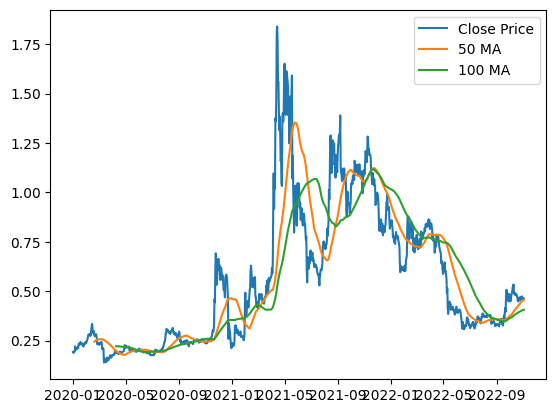

In [85]:
#overall price movement with 50 day moving average
plt.plot(df.close,label='Close Price')
plt.plot(df.close.rolling(50).mean(),label='50 MA')
plt.plot(df.close.rolling(100).mean(),label ='100 MA')
plt.legend()

In [86]:
df['close_50_ma']= df.close.rolling(50).mean()
df['close_100_ma']= df.close.rolling(100).mean()

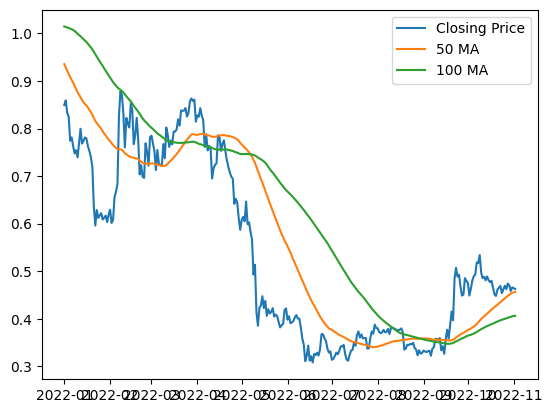

In [87]:
plt.plot(df[df.year==2022].close)
plt.plot(df[df.year==2022].close_50_ma)
plt.plot(df[df.year==2022].close_100_ma)
plt.legend(['Closing Price','50 MA','100 MA'])

I'll track the percent change from day to day

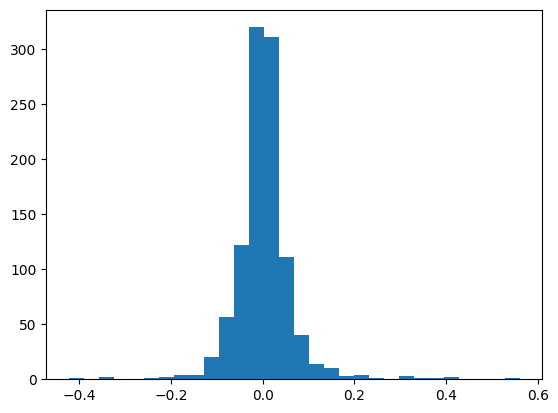

In [88]:
df['close_pct_change'] = df.close.pct_change()
plt.hist(df.close_pct_change,bins=30,)
plt.show()

In [89]:
import seaborn as sns

<Figure size 1200x1200 with 0 Axes>

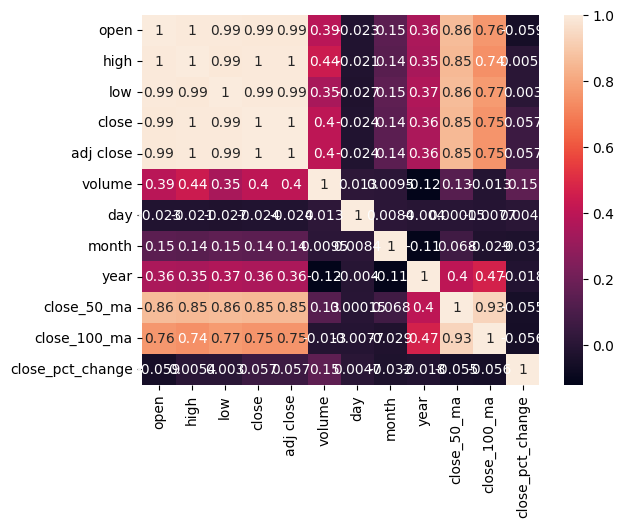

<Figure size 1200x1200 with 0 Axes>

In [90]:
sns.heatmap(df.corr(),annot=True)
plt.figure(figsize=[12,12])

#### First we'll test for stationarity using the Dickey Fuller from statsmodels
- if p<0.5:
    - Data is Stationary 
- elif p>0.5 :
    - Data is Not Stationary
- else:
    - idk

In [91]:
#the data is stationary so ill continue to modeling
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
     dftest = adfuller(df, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\n",key, ": ", val)
        
adf_test(df.close)

1. ADF :  -2.3278830228268017
2. P-Value :  0.16313275373558472
3. Num Of Lags :  21
4. Num Of Observations Used For ADF Regression: 1014
5. Critical Values :

 1% :  -3.4368154156758943

 5% :  -2.864394550773568

 10% :  -2.5682898917327046


In [92]:
# we'll use 3 models linear regression, ARIMA, and a NN

### linear regression

In [93]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

from sklearn.metrics import r2_score, mean_squared_error

In [94]:
df.reset_index(drop=True)

,open,high,low,close,adj close,volume,test_date,day,month,year,close_50_ma,close_100_ma,close_pct_change
0,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003,2020-01-01,1,1,2020,NaN,NaN,NaN
1,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426,2020-01-02,2,1,2020,NaN,NaN,-0.024000
2,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043,2020-01-03,3,1,2020,NaN,NaN,0.029132
3,0.193521,0.194653,0.191835,0.194355,0.194355,999331594,2020-01-04,4,1,2020,NaN,NaN,0.004310
4,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557,2020-01-05,5,1,2020,NaN,NaN,0.006082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,0.462427,0.474674,0.457785,0.473981,0.473981,1201992237,2022-10-28,28,10,2022,0.448185,0.402084,0.025030
1032,0.473984,0.481666,0.467697,0.470416,0.470416,1404785407,2022-10-29,29,10,2022,0.450443,0.403117,-0.007521
1033,0.470407,0.472510,0.455642,0.458455,0.458455,964813817,2022-10-30,30,10,2022,0.452458,0.404116,-0.025426
1034,0.458401,0.466114,0.449523,0.465915,0.465915,1462007947,2022-10-31,31,10,2022,0.454674,0.405180,0.016272


In [95]:
df = df.drop(columns=['adj close','test_date'])

In [96]:
df.fillna(0,inplace=True)

In [218]:
# Train test splitting
y = df.close.reset_index(drop=True) 
x = df.drop(columns=['close']).reset_index(drop=True)

In [231]:
# Since this data has a time feature Im want to keep it in order
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.15,shuffle=False)

In [232]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [233]:
lin_reg.intercept_

1.3849680969363773

In [234]:
lin_reg.coef_

array([-5.19289687e-01,  8.42177817e-01,  6.65540559e-01, -1.80633286e-13,
       -1.56123787e-05, -2.42247695e-05, -6.85067929e-04,  4.72603799e-03,
        2.68567104e-03])

In [238]:
lin_reg_preds = lin_reg.predict(x_test)

In [245]:
perf_df = pd.DataFrame([lin_reg_preds,y_test]).transpose()
perf_df.columns = ['preds','actual']

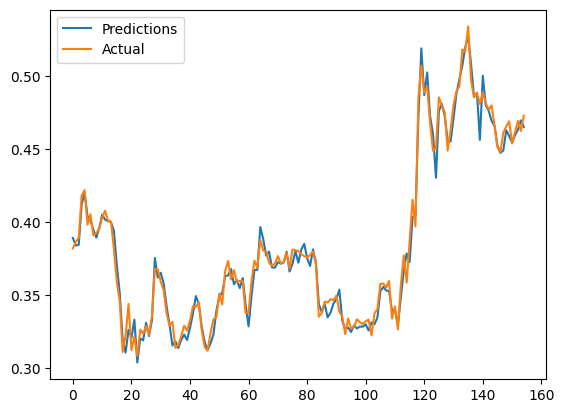

In [246]:
plt.plot(perf_df.preds)
plt.plot(perf_df.actual)
plt.legend(['Predictions','Actual'])

In [72]:
df.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2020-01-01,0.192912,0.194362,0.192107,0.192667,0.192667,1041134003
2020-01-02,0.192708,0.192896,0.186947,0.188043,0.188043,1085351426
2020-01-03,0.187948,0.194070,0.185846,0.193521,0.193521,1270017043
2020-01-04,0.193521,0.194653,0.191835,0.194355,0.194355,999331594
2020-01-05,0.194367,0.199223,0.193884,0.195537,0.195537,1168067557


### ARIMA MODELING

In [63]:
df = get_historic_price()
df.columns = df.columns.str.lower()

[*********************100%***********************]  1 of 1 completed


In [67]:
df.index = pd.DatetimeIndex(df.index).to_period('D')

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [69]:
train = df[df.index <= pd.to_datetime("2022-05-01", format='%Y-%m-%d')]
test = df[df.index >= pd.to_datetime("2022-05-02", format='%Y-%m-%d')]
y_sari = df.close

#### how to choose the order

In [70]:
sarima = SARIMAX(y_sari,order=(1,0,1))

In [71]:
sarima = sarima.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.62819D+00    |proj g|=  8.35118D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2      6      1     0     0   5.028D-03  -1.628D+00
  F =  -1.6281966596830573     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [ ]:
y_pred = sarima.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 